In [66]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
data = pd.read_excel('600000.SH.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [67]:
#查看数据前三行
data.head(3)

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720


In [68]:
#查看每列数据缺失值情况
data.isnull().sum()

代码           1
简称           2
日期           2
前收盘价(元)      2
开盘价(元)       2
最高价(元)       2
最低价(元)       2
收盘价(元)       2
成交量(股)       2
成交金额(元)      2
涨跌(元)        2
涨跌幅(%)       2
均价(元)        2
换手率(%)       2
A股流通市值(元)    2
总市值(元)       2
A股流通股本(股)    2
市盈率          2
dtype: int64

In [69]:
#提取日期列含有空值的行
data[data['日期'].isnull()]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#输出每列缺失值具体行数
for columnname in data.columns:
    if data[columnname].count() != len(data):
        loc = data[columnname][data[columnname].isnull().values==True].index.tolist()
        print('列名："{}",第{}行位置有缺失值'.format(columnname,loc))

列名："代码",第[327]行位置有缺失值
列名："简称",第[327, 328]行位置有缺失值
列名："日期",第[327, 328]行位置有缺失值
列名："前收盘价(元)",第[327, 328]行位置有缺失值
列名："开盘价(元)",第[327, 328]行位置有缺失值
列名："最高价(元)",第[327, 328]行位置有缺失值
列名："最低价(元)",第[327, 328]行位置有缺失值
列名："收盘价(元)",第[327, 328]行位置有缺失值
列名："成交量(股)",第[327, 328]行位置有缺失值
列名："成交金额(元)",第[327, 328]行位置有缺失值
列名："涨跌(元)",第[327, 328]行位置有缺失值
列名："涨跌幅(%)",第[327, 328]行位置有缺失值
列名："均价(元)",第[327, 328]行位置有缺失值
列名："换手率(%)",第[327, 328]行位置有缺失值
列名："A股流通市值(元)",第[327, 328]行位置有缺失值
列名："总市值(元)",第[327, 328]行位置有缺失值
列名："A股流通股本(股)",第[327, 328]行位置有缺失值
列名："市盈率",第[327, 328]行位置有缺失值


In [71]:
#删除所有存在缺失值的行
data.dropna(axis=0,how='any',inplace=True)
#方法二
#data.drop([327,328])

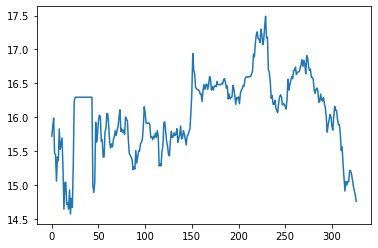

In [72]:
#绘制收盘价的折线图
plt.plot(data['收盘价(元)'])

<AxesSubplot:>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages

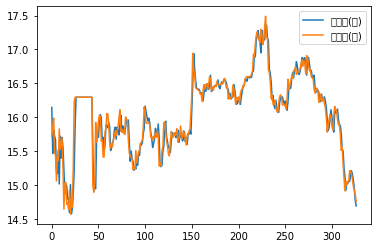

In [73]:
#同时绘制开盘价与收盘价
data[['开盘价(元)','收盘价(元)']].plot()

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='涨跌幅(%)', ylabel='Density'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


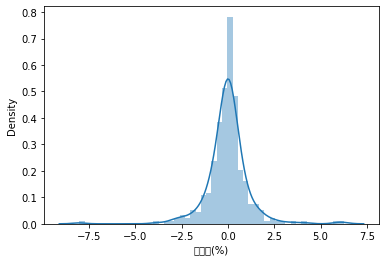

In [74]:
#绘制涨跌幅的直方图
#方法一
#plt.hist(data['涨跌幅(%)'])
#方法二
#data['涨跌幅(%)'].hist()
#方法三
sns.distplot(data['涨跌幅(%)'],hist=True)

<AxesSubplot:>

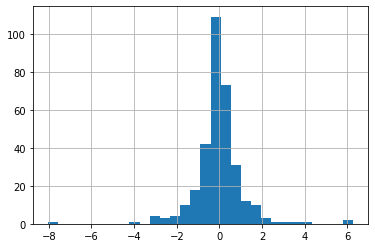

In [75]:
#让直方图更加细致
#在hist内部加入参数bins调节
data['涨跌幅(%)'].hist(bins=30)

In [76]:
#以data的列名创建一个dataframe
tmp = pd.DataFrame(columns=data.columns)
tmp

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率


In [77]:
#打印所有换手率不是数字的行
data[data['换手率(%)'].apply(lambda x :len(re.findall('^[0-9]+(\.?[0-9]+)?$', str(x))))<1]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [78]:
#打印所有换手率为--的行
data[data['换手率(%)']=='--']

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [79]:
#重置data的行号
data.reset_index(drop=True,inplace=True)

In [80]:
#删除所有换手率为非数字的行
#根据正则拿出所有非数字的行，删除对应下标所在的行
data.drop(data[data['换手率(%)'].apply(lambda x :len(re.findall('^[0-9]+(\.?[0-9]+)?$', str(x))))<1].index, axis=0).shape
data

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
3,600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
4,600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,600000.SH,浦发银行,2017-05-03,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
323,600000.SH,浦发银行,2017-05-04,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
324,600000.SH,浦发银行,2017-05-05,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744
325,600000.SH,浦发银行,2017-05-08,14.9200,14.7800,14.9000,14.5100,14.8600,43568576,638781010,-0.0600,-0.4021,14.6615,0.2015,3.212476e+11,3.212476e+11,2.161828e+10,6.0500


In [88]:
# 利用循环找出所有非数字类型的下标
drop_index_list = []
for index in data.index:
    if type(data.loc[index, '换手率(%)']) != float:
        drop_index_list.append(index)
data.drop(drop_index_list, axis=0, inplace=True)


C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='换手率(%)', ylabel='Density'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


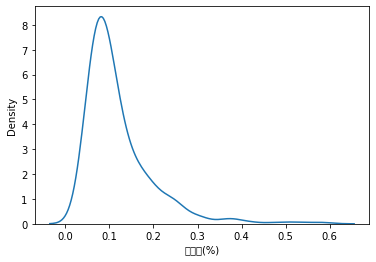

In [90]:
#绘制换手率的密度曲线
#data['换手率(%)'].plot(kind='kde')
sns.distplot(data['换手率(%)'],hist=False)

In [91]:
#计算前一天与后一天收盘价的差值
data['收盘价(元)'].diff()

0         NaN
1      0.1413
2      0.1237
3     -0.5211
4     -0.0177
        ...  
322   -0.0800
323   -0.1000
324   -0.0600
325   -0.0600
326   -0.1000
Name: 收盘价(元), Length: 309, dtype: float64

In [92]:
#计算前一天与后一天收盘价变化率
#pct_change 当前元素与先前元素的百分比变化
data['收盘价(元)'].pct_change(periods=1)

0           NaN
1      0.008988
2      0.007799
3     -0.032598
4     -0.001145
         ...   
322   -0.005277
323   -0.006631
324   -0.004005
325   -0.004021
326   -0.006729
Name: 收盘价(元), Length: 309, dtype: float64

In [93]:
#设置日期为索引
data = data.set_index('日期')

In [95]:
#以5个数据作为一个数据滑动窗口，在这个五个数据上取均值（收盘价）
#采用rolling滚动窗口计算
data[['收盘价(元)']].rolling(5).mean()

,收盘价(元)
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,15.69578
...,...
2017-05-03,15.14200
2017-05-04,15.12800
2017-05-05,15.07000


In [96]:
#以5个数据作为一个数据滑动窗口，计算这五个数据总和
data[['收盘价(元)']].rolling(5).sum()

,收盘价(元)
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,78.4789
...,...
2017-05-03,75.7100
2017-05-04,75.6400
2017-05-05,75.3500


<AxesSubplot:xlabel='日期'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


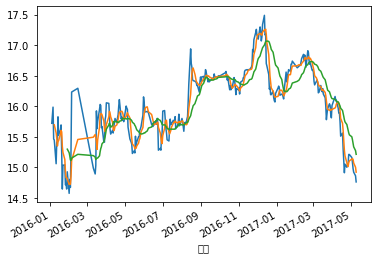

In [97]:
#将收盘价5日均线、20日均线与原始数据绘制在同一个图上
data['收盘价(元)'].plot()
data['收盘价(元)'].rolling(5).mean().plot()
data['收盘价(元)'].rolling(20).mean().plot()

In [99]:
#按周为采样规则，取一周收盘价最大值
data['开盘价(元)'].resample('W',label='left').sum()
#data['开盘价(元)'].resample('7D',label='left').sum()

日期
2016-01-03    78.8056
2016-01-10    76.6154
2016-01-17    76.7303
2016-01-24    74.1779
2016-01-31    74.3368
               ...   
2017-04-09    79.6100
2017-04-16    76.3200
2017-04-23    75.3300
2017-04-30    60.3900
2017-05-07    29.4700
Freq: W-SUN, Name: 开盘价(元), Length: 71, dtype: float64

<AxesSubplot:xlabel='日期'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


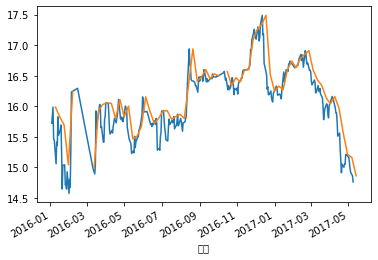

In [100]:
#绘制重采样数据与原始数据
data['收盘价(元)'].plot()
data['收盘价(元)'].resample('W').max().plot()

In [101]:
#将数据往后移动5天
data.shift(periods=5,axis=0,fill_value=0)

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.0000,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
2016-01-05,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.0000,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
2016-01-06,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.0000,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
2016-01-07,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.0000,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
2016-01-08,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.0000,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,600000.SH,浦发银行,15.00,15.02,15.10,14.99,15.05,12975919,195296862,0.05,0.3333,15.0507,0.06,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-04,600000.SH,浦发银行,15.05,15.06,15.11,15.00,15.05,14939871,225022668,0.00,0.0000,15.0619,0.0691,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-05,600000.SH,浦发银行,15.05,15.05,15.25,15.03,15.21,22887645,345791526,0.16,1.0631,15.1082,0.1059,3.288140e+11,3.288140e+11,2.161828e+10,6.1925


In [102]:
#将数据往前移动五天
data.shift(-5)

,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,
2016-01-04,600000.SH,浦发银行,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.180417e+11,3.180417e+11,1.865347e+10,6.2849
2016-01-05,600000.SH,浦发银行,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.255031e+11,3.255031e+11,1.865347e+10,6.4324
2016-01-06,600000.SH,浦发银行,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.243839e+11,3.243839e+11,1.865347e+10,6.4102
2016-01-07,600000.SH,浦发银行,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.294,3.342702e+11,3.342702e+11,1.865347e+10,6.6056
2016-01-08,600000.SH,浦发银行,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.279280e+11,3.279280e+11,1.865347e+10,6.4803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#使用expending函数计算开盘价的移动窗口均值
data['开盘价(元)'].expanding(min_periods=1).mean()

日期
2016-01-04    16.144400
2016-01-05    15.804400
2016-01-06    15.805867
2016-01-07    15.784525
2016-01-08    15.761120
                ...    
2017-05-03    16.041489
2017-05-04    16.038314
2017-05-05    16.034769
2017-05-08    16.030695
2017-05-09    16.026356
Name: 开盘价(元), Length: 309, dtype: float64

<AxesSubplot:xlabel='日期'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


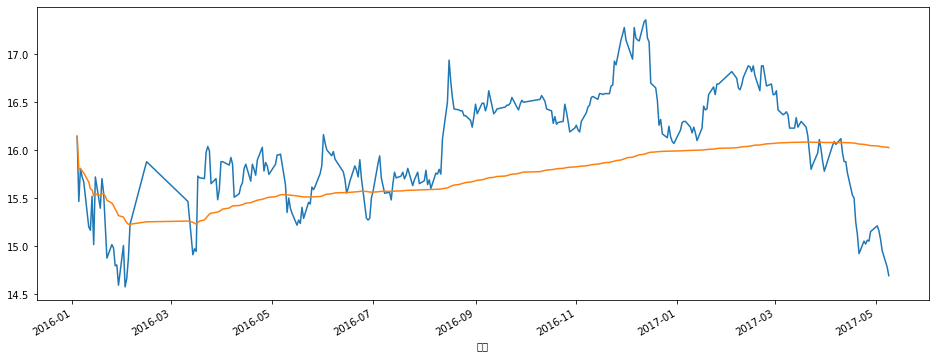

In [104]:
#绘制上一题的移动均值与原始数据折线图
data['开盘价(元)'].plot(figsize=(16,6))
data['开盘价(元)'].expanding(1).mean().plot()

In [105]:
#计算布林指标
"""计算公式：中轨线=N日的移动平均线
上轨线=中轨线+两倍的标准差
下轨线=中轨线-两倍的标准差"""
#按周计算
data['中轨线']=data['收盘价(元)'].rolling(7).mean()
data['上轨线'] = data['中轨线'] + 2 * data['收盘价(元)'].rolling(7).std()
data['下轨线'] = data['中轨线'] - 2 * data['收盘价(元)'].rolling(7).std()

<AxesSubplot:xlabel='日期'>

C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages

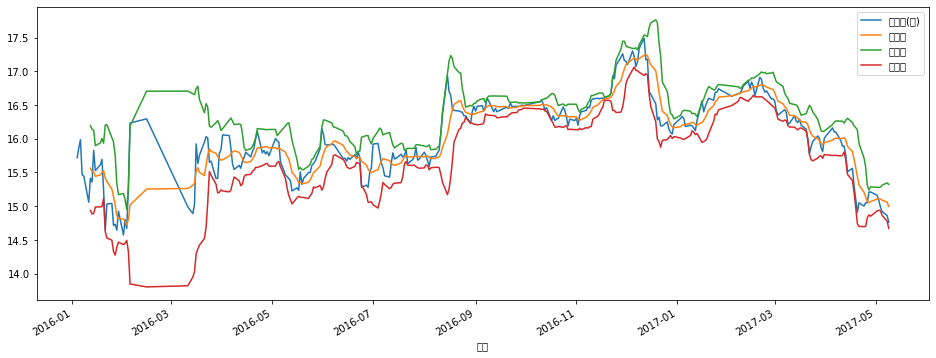

In [106]:
#计算布林线并绘制
data[['收盘价(元)', '中轨线', '上轨线', '下轨线']].plot(figsize=(16,6))